# <center> <h1> Titamic para Data Science</h1> </center>
 # <center> <h1>Jack debia morir realmente ?</h1> </center>

**********  

El trabajo consiste en desarrollar un algoritmo con el que podamos predecir si el la probabilidad que una persona halla muerto en el Titanic, o tal vez poder saber si Jack realmente debio morir segun los datos del naufragio. Para lograr este objetivo, usaréis un conjunto de datos de la lista de pasajeros para poder analizar las variables necesarias y construir el modelo de machine learning que nos ayudará a validar los supuesto.

**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy, Scikit-learn.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar Notebooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Clasificador*" para analizar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción.


¡Te animas!

## **1. Importa las librerías necesarias**

In [1]:
#importamos librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importamos los datos pasamos el id de pasajero como index
test = pd.read_csv(r'data\test.csv')
train = pd.read_csv(r'data\train.csv')

In [98]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,1.0
1,2,1,1,0,38.000000,1,0,71.2833,2.0
2,3,1,3,0,26.000000,0,0,7.9250,1.0
3,4,1,1,0,35.000000,1,0,53.1000,1.0
4,5,0,3,1,35.000000,0,0,8.0500,1.0
5,6,0,3,1,29.699118,0,0,8.4583,0.0
6,7,0,1,1,54.000000,0,0,51.8625,1.0
7,8,0,3,1,2.000000,3,1,21.0750,1.0
8,9,1,3,0,27.000000,0,2,11.1333,1.0
9,10,1,2,0,14.000000,1,0,30.0708,2.0


In [97]:
test.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## **2. creamos un diccionario**

Utizaremos el set Train, que contiene el dato de si el pasajero sobrevivio o no

- passengerId : ID del pasajero abordo

- survival : Sí la persona sobrevivió o no el accidente

- pclase : Tipo de Ticket, e.g., 1ra, 2da, 3ra

- gender : Género del pasajero: Masculino o femenino

- name : Título incluído

- age : Edad en anos

- sibsp : Número de parientes/cónyuges abordo del Titanic

- parch : Número de padres/hijos abordo del Titanic

- ticket : Número Ticket

- fare : Costo pasaje

- cabin : Número cabina

- embarked : Puerto de embarcación

## **3. verificamos los datos disponibles**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


R// Podemos observar que el total de filas es de 891, ademas que **Age, Cabin y Embarked** contiene datos nulos, los que debemos revisar

In [7]:
#Revisemos las correlaciones de las variables para ver como se comportan incialmente
#Agregamos style para tener una relacion de colorres
train.corr().style.background_gradient()  #background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(4)#inidcalos los decimales de los datos

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0000,-0.0050,-0.0351,0.0368,-0.0575,-0.0017,0.0127
Survived,-0.0050,1.0000,-0.3385,-0.0772,-0.0353,0.0816,0.2573
Pclass,-0.0351,-0.3385,1.0000,-0.3692,0.0831,0.0184,-0.5495
Age,0.0368,-0.0772,-0.3692,1.0000,-0.3082,-0.1891,0.0961
SibSp,-0.0575,-0.0353,0.0831,-0.3082,1.0000,0.4148,0.1597
Parch,-0.0017,0.0816,0.0184,-0.1891,0.4148,1.0000,0.2162
Fare,0.0127,0.2573,-0.5495,0.0961,0.1597,0.2162,1.0000


In [9]:
train.describe().style.background_gradient(cmap='coolwarm').set_precision(4)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [ ]:
#puedes evaluar la realcion de todas las variables de tu df.
#train.style.background_gradient(cmap='coolwarm')

Podemos observar que a primeras no existe una correlacion relevante entre las variables numericas, sin embargo podemos hacer algunas correciones a los datos para poder tener mejores conclusiones

## **4. Limpiando la data**

sabemos que las var Age, Cabin y Embarked contiene valores nulos

In [16]:
train_nul = train[['Age','Cabin','Embarked']].head()
train_nul.isnull().count()
#Debemos defin,ir que hacer con estos datos podemos rellenar o borrar todo dependera de que representen

Age         5
Cabin       5
Embarked    5
dtype: int64

In [15]:
train['Pclass'].isnull().count()

891

Sabemos que Cabin tiene la mayor cantidad de datos nulos, elimar esas filas afectaria notablemente las conclusiones
entonces borraremos la columna, considerando que tampoco no entrega inf relevante por ahora.

In [43]:
#dejamos el df original por si queremos reinicar desde aca 
#train = pd.read_csv(r'data\train.csv')

In [46]:
#Eliminaremos la calumna
train.drop(inplace=True,columns=['Cabin'])
train.drop(inplace=True,columns=['Ticket'])

In [20]:
train.groupby(['Sex','Survived'])['Age'].agg('describe')

count       mean        std   min    25%   50%    75%   max
Sex    Survived                                                             
female 0          64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
       1         197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
male   0         360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
       1          93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

In [21]:
train.groupby(['Sex','Survived'])['Age'].agg('sum')

Sex     Survived
female  0            1603.00
        1            5683.00
male    0           11382.50
        1            2536.67
Name: Age, dtype: float64

<AxesSubplot:ylabel='Survived,Sex'>

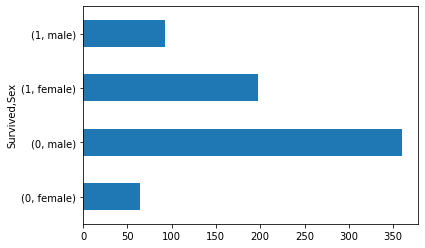

In [22]:
train.groupby(['Survived','Sex'])['Age'].agg('count').plot(kind='barh')

<AxesSubplot:xlabel='Survived,Pclass'>

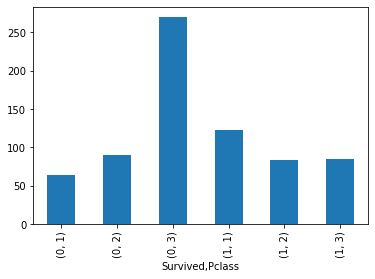

In [23]:
train.groupby(['Survived','Pclass'])['Age'].agg('count').plot(kind='bar')

Podemos ver que los pasajeros de 3ra clase fueron los que mas perdieron la vida, tambien podemos ver que fueron mas los hombres que murieron.

In [25]:
#Tambien podemos generar una funcion que agrupe
def graf_bar (argumento): #creamos una funcion que recibe un nombre de alguna columna puede tener el nombre que 
    #creamos las variables de acuerdo a la columna base
    vive = train[train['Survived']==1][argumento].value_counts()
    muere = train[train['Survived']==0][argumento].value_counts()
    #Creamos un df con esas variables y las dejamos en el index
    df = pd.DataFrame([vive,muere])
    df.index = ['vive','muere']
    #ahora podemos graficar en barras acumuladas
    df.plot(kind='bar', stacked = True)

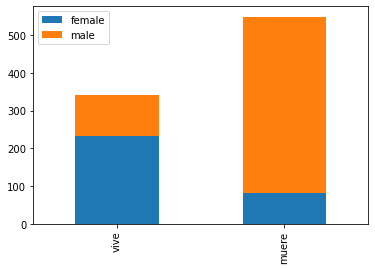

In [26]:
graf_bar('Sex')

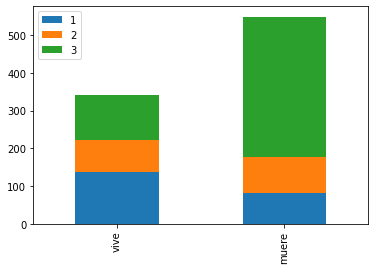

In [107]:
graf_bar('Pclass')

## sns.barplot:
La función a nivel de figura seaborn.catplot con el argumento kind = "bar" o la función a nivel de ejes seaborn.barplot generan gráficos de barras que tienen un comportamiento ligeramente diferente al habitual: normalmente un gráfico de barras muestra el recuento de valores en cada categoría. Aun cuando esta funcionalidad también está contemplada en seaborn, las funciones mencionadas van mucho más allá de un simple recuento: aplican una función que calcula una medida de tendencia central (por defecto es el valor medio) y muestran, aplicando bootstrapping, el intervalo de confianza del 95% para dicha medida.

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

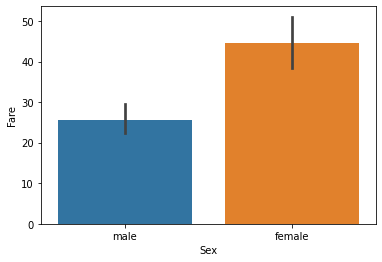

In [31]:
sns.barplot(x='Sex', y='Fare', data=train) #valore promedio de la barra 

In [32]:
train.groupby(['Sex'])['Fare'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,44.479818,57.997698,6.75,12.071875,23.0,55.00,512.3292
male,577.0,25.523893,43.138263,0.00,7.895800,10.5,26.55,512.3292


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

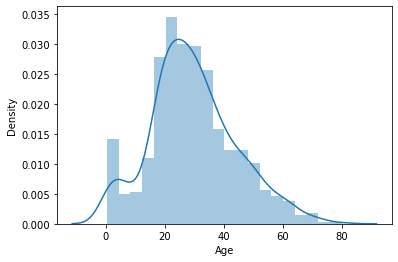

In [33]:
sns.distplot(train['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


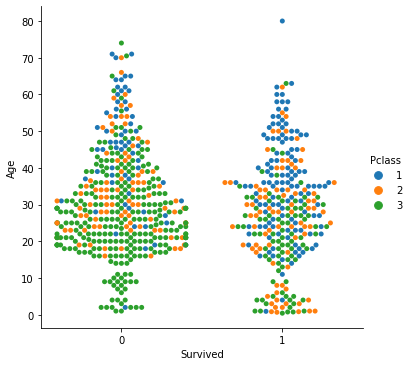

In [34]:
sns.catplot(y="Age", x="Survived", hue="Pclass", data=train,kind="swarm");
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


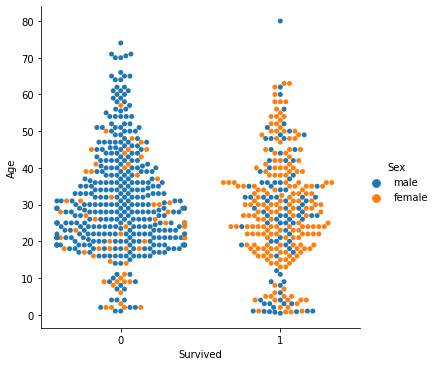

In [35]:
sns.catplot(y="Age", x="Survived", hue="Sex", data=train,kind="swarm");
plt.show()

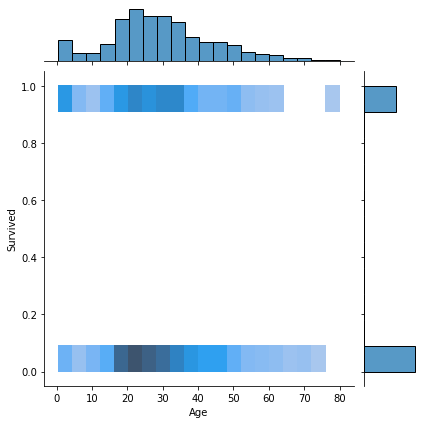

In [36]:
sns.jointplot(data=train, x ='Age', y ='Survived', kind='hist')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


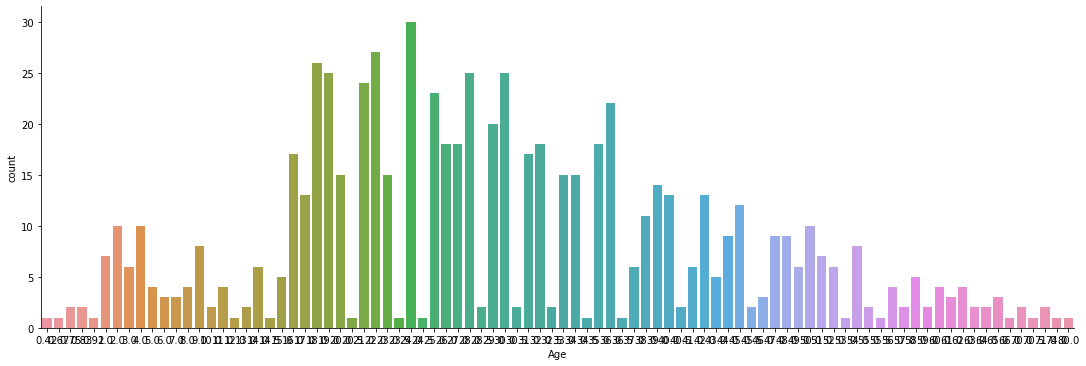

In [37]:
sns.factorplot('Age',data=train ,kind="count", aspect=3)

## Sin embargo si notamos existen datos que estan represetados por variables no numericas que pueden ser factores de realcion con los resultados del naufragio, es decir sobre si el pasajero sobrevive o no.

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Lo que haremos primero es transformar las variables Sex y Embarked en var categoricas

In [44]:
# exiten varias formar de transformar datos 
train['Sex'].replace(['female','male'],[0,1],inplace=True)
train['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)

In [41]:
# #utulizamos el metodo sklearn que nos permite entrenar algunos modelos regresivos
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# train['Sex']=labelencoder.fit_transform(train['Sex'].values)
# train['Sex'].unique()
# #transformamos lo datos a valores para luego interpolar sobre los datos nulos
# labelencoder=LabelEncoder()
# train['Embarked']=labelencoder.fit_transform(train['Embarked'].astype(str))
# train['Embarked'].unique()

array([1, 2, 0, 3])

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1.0


In [48]:
#ahora podemos revisar los datos nulos para saber que hacemos con ellos
#seria interesanta saber por que faltan edades en el data
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [50]:
train['Age'].mean()

29.699117647058763

In [51]:
#Remplazamos los datos nulos por la mediana en cafa caso
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Embarked'].fillna(train['Embarked'].median(), inplace=True)

In [52]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [82]:
#revisamos la columna de nombre podemos observar que estan categorizados con Mr MSS Cap entre otras veamos que tenemso
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [73]:
#intentaremos crear una nueva columna que indique  el titulo del pasajero
# crear una nueva columna en funcion del titulo del tripulante
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [79]:
#podriamos categorizar estos datos para ver si relacion con el final de la historia,
#sin embargo sabemos que el capitan no abandona el barco
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Don           1
Lady          1
Jonkheer      1
Ms            1
Mme           1
Sir           1
Capt          1
Name: Title, dtype: int64

In [83]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


Podemos ver que existia un capitan e incluso una condesa abordo del barco

<AxesSubplot:>

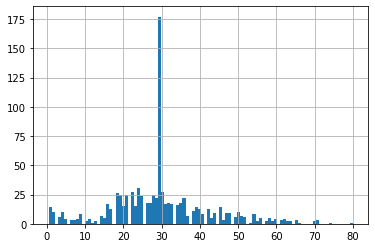

In [84]:
train['Age'].hist(bins=100)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

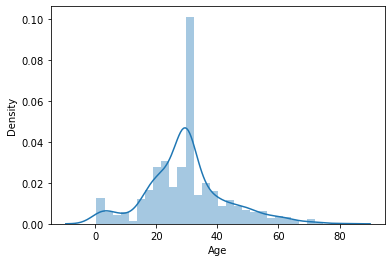

In [85]:
sns.distplot(train['Age'])

In [86]:
from scipy import stats
pendiente, intercepto, r_value, p_value, std_err = stats.linregress(train['Survived'],train['Fare'])

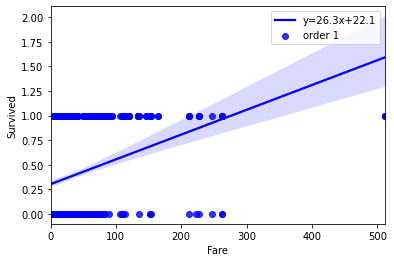

In [87]:
sns.regplot(data=train , x='Fare', y='Survived', scatter= True, color='blue', label='order 1', 
            line_kws={'label':'y={0:.1f}x+{1:.1f}'.format(pendiente,intercepto)})
plt.legend()

In [89]:
#Elimino las columnas que considero que no son necesarias para el analisis
train = train.drop(['Name','Title'], axis=1 )
train.corr().style.background_gradient()

KeyError: "['Name' 'Title'] not found in axis"

## Ahora vamos a entrenar el modelo para poder predecir si los pasajeros de ciertas caracteristica debieron morir o no 

In [90]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1.0
1,2,1,1,0,38.0,1,0,71.2833,2.0
2,3,1,3,0,26.0,0,0,7.9250,1.0
3,4,1,1,0,35.0,1,0,53.1000,1.0
4,5,0,3,1,35.0,0,0,8.0500,1.0


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [92]:
#utilizaremos scitlearnk
#aca separo en columna con la inforacion de los sobrevivientes
X = np.array(train.drop(['Survived'], 1))
Y = np.array(train['Survived'])

In [93]:
#Seperamos la data en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [94]:
#regresion logistica
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print('Precisión Regresión Logística:')
print(logreg.score(X_train, Y_train))

Precisión Regresión Logística:
0.8075842696629213


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
prediccion_logreg = logreg.predict(train.drop('PassengerId', axis=1))
out_logreg = pd.DataFrame({ 'PassengerId' : id, 'Survived': prediccion_logreg })
print('Predicción Regresión Logística:')
print(out_logreg.head(10))

Predicción Regresión Logística:
              PassengerId  Survived
0  <built-in function id>         0
1  <built-in function id>         1
2  <built-in function id>         1
3  <built-in function id>         1
4  <built-in function id>         0
5  <built-in function id>         0
6  <built-in function id>         0
7  <built-in function id>         0
8  <built-in function id>         1
9  <built-in function id>         1


In [102]:
#MAQUINA VECTORES
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print('Precisión Soporte de Vectores:')
print(svc.score(X_train, Y_train))

Precisión Soporte de Vectores:
0.6558988764044944


In [104]:
prediccion_svc = svc.predict(train.drop('PassengerId', axis=1))
out_svc = pd.DataFrame({ 'PassengerId' : id, 'Survived': prediccion_svc })
print('Predicción Soporte de Vectores:')
print(out_svc.head())

Predicción Soporte de Vectores:
              PassengerId  Survived
0  <built-in function id>         0
1  <built-in function id>         0
2  <built-in function id>         0
3  <built-in function id>         0
4  <built-in function id>         0


In [105]:
#vecinos mas cercanos
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print('Precisión Vecinos más Cercanos:')
print(knn.score(X_train, Y_train))

Precisión Vecinos más Cercanos:
0.7935393258426966


In [106]:
ids = train['PassengerId']
prediccion_knn = knn.predict(train.drop('PassengerId', axis=1))
out_knn = pd.DataFrame({ 'PassengerId' : id, 'Survived': prediccion_knn })
print('Predicción Vecinos más Cercanos:')
print(out_knn.head())

Predicción Vecinos más Cercanos:
              PassengerId  Survived
0  <built-in function id>         0
1  <built-in function id>         1
2  <built-in function id>         0
3  <built-in function id>         1
4  <built-in function id>         0
